## COMM 187 (160DS): Data Science in Communication Research -- Spring 2024

## Coding Lab #9: Advanced Data Visualization with Python
**Wednesday, May 29, 2024** 

Welcome to the Coding Lab #9 for COMM 187 (160DS): Data Science in Communication Research! 

In the last Coding Lab, we learnt about visualizing data through line plots, scatter plots, and histograms.

Today's lesson plan:
 - Bar plots
 - Stacked bar plots
 - Box plots

### Dataset

Let us work with our familiar and trusty `metro-grades.csv` dataset again. For reference, here is what each column in the dataset means: 


Header | Definition
--- | ---
`metro_area` | Official U.S. Census name of micro- or metropolitan area — defined as ["Core-Based Statistical Areas"](https://www.census.gov/topics/housing/housing-patterns/about/core-based-statistical-areas.html). The first city and state listed are used as the display name for each micro/metropolitan area in the story (for example, "Chicago-Naperville-Elgin, IL-IN-WI" is referred to as "Chicago, IL").
`holc_grade` | Grade assigned by the Home Owners' Loan Corporation (HOLC). `A`: "best" (green). `B`: "Still Desirable" (blue). `C`: "Definitely Declining" (yellow). `D`: "Hazardous" (red).
`white_pop` | Estimate of non-Hispanic white population within HOLC zones with a given `holc_grade` in a given `metro_area`. Rounded to the nearest integer.
`black_pop` | Estimate of non-Hispanic Black population within HOLC zones with a given `holc_grade` in a given `metro_area`. Rounded to the nearest integer.
`hisp_pop` | Estimate of Hispanic/Latino population within HOLC zones with a given `holc_grade` in a given `metro_area`. Rounded to the nearest integer.
`asian_pop` | Estimate of non-Hispanic Asian population within HOLC zones with a given `holc_grade` in a given `metro_area`. Rounded to the nearest integer.
`other_pop` | Estimate of population in any other racial/ethnic groups within HOLC zones with a given `holc_grade` in a given `metro_area`. Rounded to the nearest integer.
`total_pop` | Estimate of total population (across all racial/ethnic groups) within HOLC zones with a given `holc_grade` in a given `metro_area`. Rounded to the nearest integer.
`pct_white` | Estimate of the percentage of total population within HOLC zones with a given `holc_grade` in a given `metro_area` that are non-Hispanic white. Represented between 0-100. Rounded to the nearest two decimal places.
`pct_black` | Estimate of the percentage of total population within HOLC zones with a given `holc_grade` in a given `metro_area` that are non-Hispanic Black. Represented between 0-100. Rounded to the nearest two decimal places.
`pct_hisp` | Estimate of the percentage of total population within HOLC zones with a given `holc_grade` in a given `metro_area` that are Hispanic/Latino. Represented between 0-100. Rounded to the nearest two decimal places.
`pct_asian` | Estimate of the percentage of total population within HOLC zones with a given `holc_grade` in a given `metro_area` that are non-Hispanic Asian. Represented between 0-100. Rounded to the nearest two decimal places.
`pct_other` | Estimate of the percentage of total population within HOLC zones with a given `holc_grade` in a given `metro_area` in any other racial/ethnic group. Represented between 0-100. Rounded to the nearest two decimal places.
`lq_white` | Non-Hispanic white location quotient for a given `holc_grade` and `metro_area`.
`lq_black` | Non-Hispanic Black location quotient for a given `holc_grade` and `metro_area`.
`lq_hisp` | Hispanic/Latino location quotient for a given `holc_grade` and `metro_area`.
`lq_asian` | Non-Hispanic Asian location quotient for a given `holc_grade` and `metro_area`.
`lq_other` | All other racial/ethnic groups' location quotient for a given `holc_grade` and `metro_area`.
`surr_area_white_pop` | Estimate of non-Hispanic white population within surrounding area of a given `metro_area`'s HOLC zones. Rounded to nearest integer. Repeated for each `holc_grade` for a given `metro_area`.
`surr_area_black_pop` | Estimate of non-Hispanic Black population within surrounding area of a given `metro_area`'s HOLC zones. Rounded to nearest integer. Repeated for each `holc_grade` for a given `metro_area`.
`surr_area_hisp_pop` | Estimate of Hispanic/Latino population within surrounding area of a given `metro_area`'s HOLC zones. Rounded to nearest integer. Repeated for each `holc_grade` for a given `metro_area`.
`surr_area_asian_pop` | Estimate of non-Hispanic Asian population within surrounding area of a given `metro_area`'s HOLC zones. Rounded to nearest integer. Repeated for each `holc_grade` for a given `metro_area`.
`surr_area_other_pop` | Estimate of population in any other racial/ethnic groups within surrounding area of a given `metro_area`'s HOLC zones. Rounded to nearest integer. Repeated for each `holc_grade` for a given `metro_area`.
`surr_area_total_pop` | Estimate of total population (across all racial/ethnic groups) within surrounding area of a given `metro_area`'s HOLC zones. Rounded to nearest integer. Repeated for each `holc_grade` for a given `metro_area`.
`surr_area_pct_white` | Estimate of the percentage of total population within surrounding area of a given `metro_area`'s HOLC zones that are non-Hispanic white. Represented between 0-100. Rounded to the nearest two decimal places. Repeated for each `holc_grade` for a given `metro_area`.
`surr_area_pct_black` | Estimate of the percentage of total population within surrounding area of a given `metro_area`'s HOLC zones that are non-Hispanic Black. Represented between 0-100. Rounded to the nearest two decimal places. Repeated for each `holc_grade` for a given `metro_area`.
`surr_area_pct_hisp` | Estimate of the percentage of total population within surrounding area of a given `metro_area`'s HOLC zones that are Hispanic/Latino. Represented between 0-100. Rounded to the nearest two decimal places. Repeated for each `holc_grade` for a given `metro_area`.
`surr_area_pct_asian` | Estimate of the percentage of total population within surrounding area of a given `metro_area`'s HOLC zones that are non-Hispanic Asian. Represented between 0-100. Rounded to the nearest two decimal places. Repeated for each `holc_grade` for a given `metro_area`.
`surr_area_pct_other` | Estimate of the percentage of total population within surrounding area of a given `metro_area`'s HOLC zones in any other racial/ethnic group. Represented between 0-100. Rounded to the nearest two decimal places. Repeated for each `holc_grade` for a given `metro_area`.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('./data/metro-grades.csv')

---

### Bar plot

Since we have already practiced histograms, bar plots should be easy to understand. Let us try it out. 

Let us plot the bar plot of total White population by HOLC Grade using `plt.bar`. Read more about this function using its [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html).

In [11]:
# First step, calculate the sum of white population by HOLC Grade
holc_grade_white_pop = df.groupby('holc_grade')['white_pop'].sum()

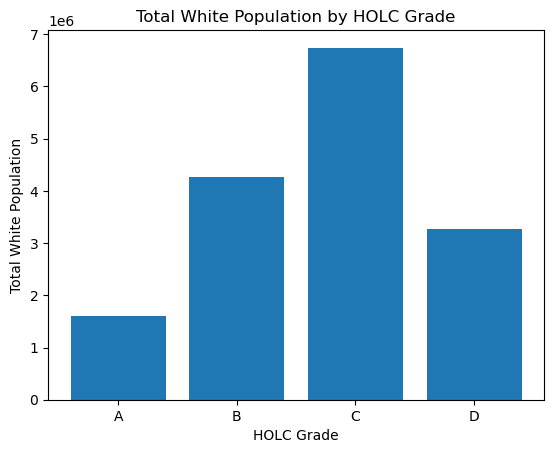

In [13]:
# Second step, make the bar plot using plt.bar
plt.bar(holc_grade_white_pop.index, holc_grade_white_pop.values)

# Add title and axes labels
plt.title('Total White Population by HOLC Grade')
plt.xlabel('HOLC Grade')
plt.ylabel('Total White Population')

# Display the plot using plt.show()
plt.show()

**Question:** Create a bar plot showing the total Asian population by HOLC grade.

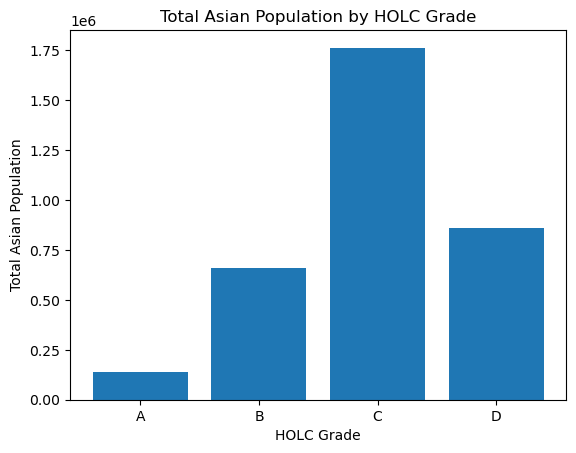

In [3]:
### Write your code below (in place of ...)
# First step, calculate the sum of white population by HOLC Grade
holc_grade_asian_pop = df.groupby('holc_grade')['asian_pop'].sum()

# Second step, make the bar plot using plt.bar
plt.bar(holc_grade_asian_pop.index, holc_grade_asian_pop.values)

# Add title and axes labels
plt.title('Total Asian Population by HOLC Grade')
plt.xlabel('HOLC Grade')
plt.ylabel('Total Asian Population')

# Display the plot using plt.show()
plt.show()

**Question:** Create a bar plot showing the White, Black, Hispanic, Asian, and Other populations in Salt Lake City, UT.

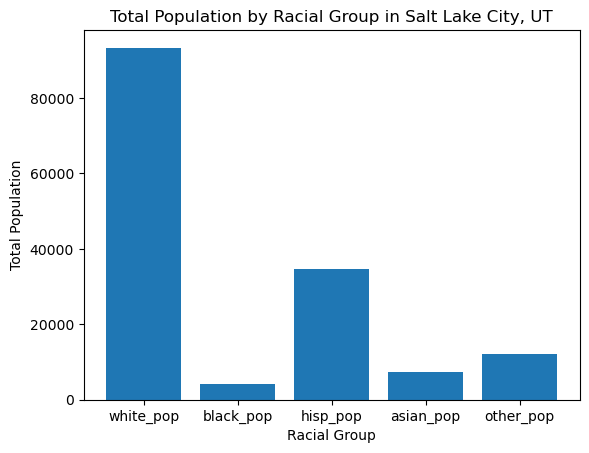

In [33]:
### Write your code below (in place of ...)
saltlake = df[df['metro_area'] == 'Salt Lake City, UT'].groupby('metro_area').sum()[['white_pop', 'black_pop', 'hisp_pop', 'asian_pop', 'other_pop']].transpose()

# Make the bar plot using plt.bar
plt.bar(saltlake.index, saltlake['Salt Lake City, UT'])

# Add title and axes labels
plt.title('Total Population by Racial Group in Salt Lake City, UT')
plt.xlabel('Racial Group')
plt.ylabel('Total Population')

# Display the plot using plt.show()
plt.show()

### Stacked-bar plot

Stacked bar plots are a type of bar plot where multiple data series are stacked on top of each other in a single bar. Each bar represents a categorical variable, and the segments within the bar represent different sub-categories that contribute to the total value of the bar. Stacked bar plots are used to show the *composition* of different categories and how they contribute to the total. They provide a visual representation of the distribution and proportion of each sub-category within the main category.

Let us plot a stacked bar plot similar to the one shown in the article about redlining:
![](./images/lab08_538_redlining_stacked.png)

In [36]:
# First, we segment the data that belongs to Cleveland
cleveland_df = df[df['metro_area'] == 'Cleveland-Elyria, OH']
cleveland_df

,metro_area,holc_grade,white_pop,black_pop,hisp_pop,asian_pop,other_pop,total_pop,pct_white,pct_black,...,surr_area_white_pop,surr_area_black_pop,surr_area_hisp_pop,surr_area_asian_pop,surr_area_other_pop,surr_area_pct_white,surr_area_pct_black,surr_area_pct_hisp,surr_area_pct_asian,surr_area_pct_other
100,"Cleveland-Elyria, OH",A,48311,13445,2968,2272,3335,70331,68.69,19.12,...,1168228,402969,121587,55854,79749,63.89,22.04,6.65,3.05,4.36
101,"Cleveland-Elyria, OH",B,100214,54660,11665,3289,8045,177872,56.34,30.73,...,1168228,402969,121587,55854,79749,63.89,22.04,6.65,3.05,4.36
102,"Cleveland-Elyria, OH",C,155360,136527,40191,7910,17076,357064,43.51,38.24,...,1168228,402969,121587,55854,79749,63.89,22.04,6.65,3.05,4.36
103,"Cleveland-Elyria, OH",D,28391,73969,13274,3312,5349,124295,22.84,59.51,...,1168228,402969,121587,55854,79749,63.89,22.04,6.65,3.05,4.36


<BarContainer object of 4 artists>

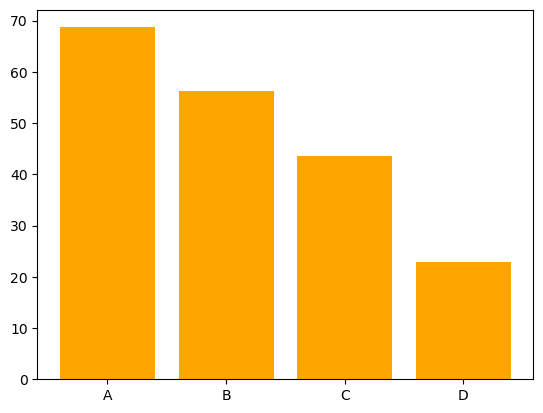

In [85]:
# Second, we initiate a plt.subplots as shown in the DataCamp assigned chapter from last week
fig, ax = plt.subplots()

# Create bars for percentage of white population with the color "orange"
ax.bar(cleveland_df['holc_grade'], cleveland_df['pct_white'], color = "orange")

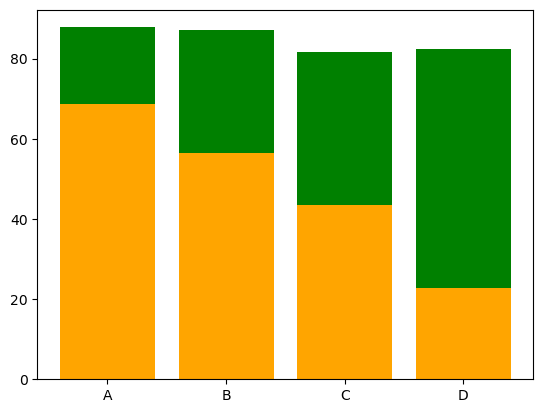

In [86]:
# Next, add bars on TOP of the these bars for the percentage of Black population in green.
# For this, we add a "bottom" parameter to the bar functions.
# The "bottom" parameter basically changes what is the bottom of the bars that being plotted.
# Since we are plotting on TOP of the % white population, the bottom of each bar for the % Black 
# population will be the value of the White population.

fig, ax = plt.subplots()

ax.bar(cleveland_df['holc_grade'], cleveland_df['pct_white'], color = "orange")

ax.bar(cleveland_df['holc_grade'], cleveland_df['pct_black'], bottom = cleveland_df['pct_white'], color = "green")

plt.show()

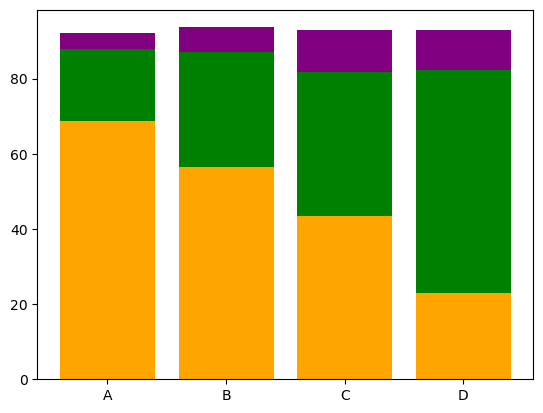

In [87]:
# Next, we add bars on top of the previous plot for % Latino population in purple.
# This time, the bottom will be the value of % White population + % Black population.

fig, ax = plt.subplots()

ax.bar(cleveland_df['holc_grade'], cleveland_df['pct_white'], color = "orange")

ax.bar(cleveland_df['holc_grade'], cleveland_df['pct_black'], bottom = cleveland_df['pct_white'], color = "green")

ax.bar(cleveland_df['holc_grade'], cleveland_df['pct_hisp'], 
       bottom = cleveland_df['pct_white']+cleveland_df['pct_black'], color = "purple")

plt.show()

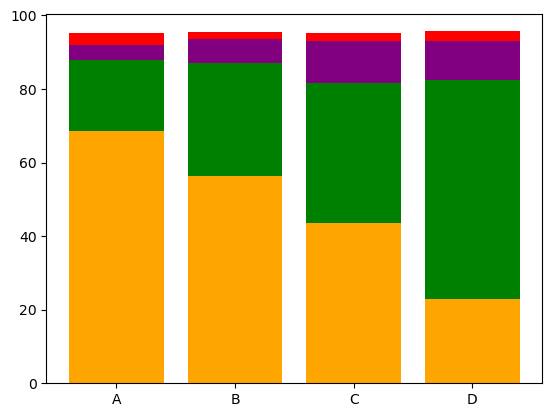

In [88]:
# Next, we add bars on top of the previous plot for Asian population in red.
# This time, the bottom will be the value of White pop + Black pop + Latino pop.

fig, ax = plt.subplots()

ax.bar(cleveland_df['holc_grade'], cleveland_df['pct_white'], color = "orange")

ax.bar(cleveland_df['holc_grade'], cleveland_df['pct_black'], bottom = cleveland_df['pct_white'], color = "green")

ax.bar(cleveland_df['holc_grade'], cleveland_df['pct_hisp'], 
       bottom = cleveland_df['pct_white']+cleveland_df['pct_black'], color = "purple")

ax.bar(cleveland_df['holc_grade'], cleveland_df['pct_asian'], 
       bottom = cleveland_df['pct_white']+cleveland_df['pct_black']+cleveland_df['pct_hisp'], color = "red")

plt.show()

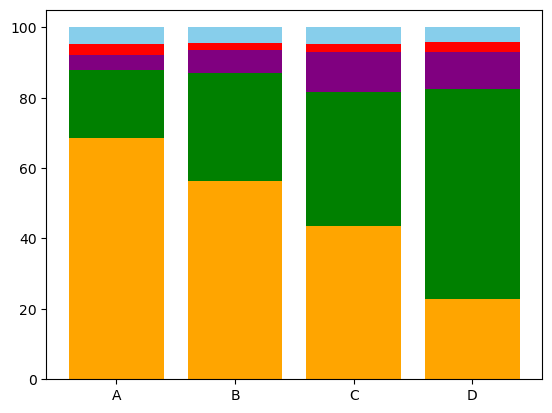

In [89]:
# Finally, on top of everything, we add bars for Other populations in Sky Blue color.

fig, ax = plt.subplots()

ax.bar(cleveland_df['holc_grade'], cleveland_df['pct_white'], color = "orange")

ax.bar(cleveland_df['holc_grade'], cleveland_df['pct_black'], bottom = cleveland_df['pct_white'], color = "green")

ax.bar(cleveland_df['holc_grade'], cleveland_df['pct_hisp'], 
       bottom = cleveland_df['pct_white']+cleveland_df['pct_black'], color = "purple")

ax.bar(cleveland_df['holc_grade'], cleveland_df['pct_asian'], 
       bottom = cleveland_df['pct_white']+cleveland_df['pct_black']+cleveland_df['pct_hisp'], color = "red")

ax.bar(cleveland_df['holc_grade'], cleveland_df['pct_other'], 
       bottom = cleveland_df['pct_white']+cleveland_df['pct_black']+cleveland_df['pct_hisp']+cleveland_df['pct_asian'], 
       color = "skyblue")

plt.show()

You can do all of this, or use the following function in `pandas` library:

<Axes: xlabel='holc_grade'>

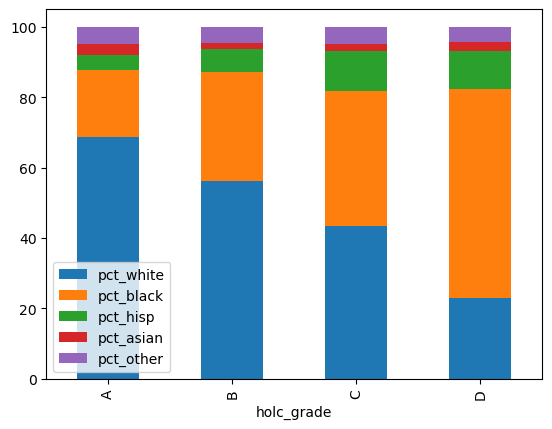

In [91]:
cleveland_df_subset = cleveland_df[['holc_grade', 'pct_white', 'pct_black', 'pct_hisp', 'pct_asian', 'pct_other']]
cleveland_df_subset.plot(x = 'holc_grade', kind='bar', stacked=True)

<Axes: ylabel='holc_grade'>

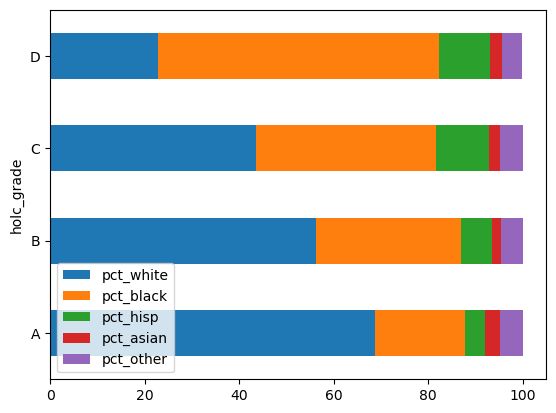

In [92]:
# If you want horizontally stacked bars, you can use barh instead of bar
cleveland_df_subset.plot(x = 'holc_grade', kind='barh', stacked=True)

**Question:** Create a stacked bar plot showing the racial composition of the population in the surrounding areas of El Paso, TX.

<Axes: xlabel='holc_grade'>

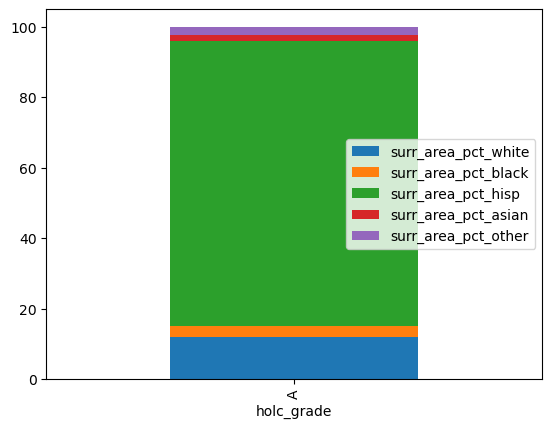

In [99]:
### Write your code below (in place of ...)
elpaso_df = df[df['metro_area'] == 'El Paso, TX'][['holc_grade', 'surr_area_pct_white', 'surr_area_pct_black', 
                                                   'surr_area_pct_hisp', 'surr_area_pct_asian', 'surr_area_pct_other']].head(1)
elpaso_df.plot(x = 'holc_grade', kind='bar', stacked=True)

### Box plots

Box plots, or box-and-whisker plots, visually summarize the distribution of a dataset. They display the median, quartiles, and potential outliers. 

![](./images/lab08_boxplot.png)

The box represents the interquartile range (IQR), with the lower and upper edges at the first (Q1) and third quartiles (Q3). The line inside the box marks the median (Q2). Whiskers extend from the box to the smallest and largest values within 1.5 * IQR from Q1 and Q3. Points outside this range are considered outliers. Box plots highlight central tendency, variability, and outliers effectively.

**IMPORTANT:** Box plots are a great way to visualize statistical comparison between two or more variables!

Let us make a boxplot figure for the percentage of White and Black population across all regions, using the function `boxplot`. Read the documentation [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html).

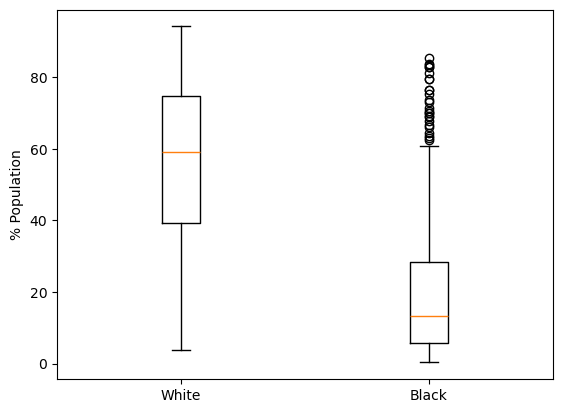

In [105]:
fig, ax = plt.subplots()
ax.boxplot([df['pct_white'], df['pct_black']])

# Add x-axis tick labels:
ax.set_xticklabels(["White", "Black"])

# Add a y-axis label
ax.set_ylabel("% Population")

plt.show()

**Question:** Let us make a boxplot figure for the percentage of White, Black, Hispanic, Asian, and Other population among on the HOLC Grade C regions.

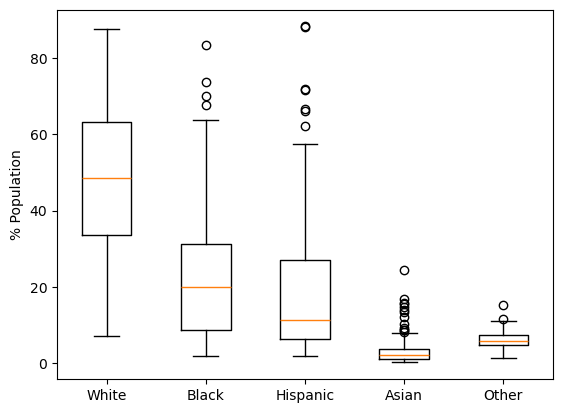

In [106]:
### Write your code below (in place of ...)
df_C = df[df['holc_grade'] == 'C']

fig, ax = plt.subplots()
ax.boxplot([df_C['pct_white'], df_C['pct_black'], df_C['pct_hisp'], df_C['pct_asian'], df_C['pct_other']])

# Add x-axis tick labels:
ax.set_xticklabels(["White", "Black", "Hispanic", "Asian", "Other"])

# Add a y-axis label
ax.set_ylabel("% Population")

plt.show()